In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path= "/content/new_data_final.csv"
df= pd.read_csv(path)
df.head()

,Ps,Fd,Wv,Wn,Wd1,Tv,actuator_damping,actuator_force,angular_disp,current,load_flow,load_pressure,orifice_flow,spool_physical_disp,fault
0,210000000,3,940,224,627,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,no
1,210000000,3,940,224,627,0.5,698.295680,151.349207,0.057624,0.529351,0.000071,415677.5375,0.000071,0.000021,no
2,210000000,3,940,224,627,0.5,577.637919,134.281313,0.116919,0.507888,0.000059,348297.0804,0.000068,0.000020,no
3,210000000,3,940,224,627,0.5,669.756180,124.984066,0.172986,0.476744,0.000068,388816.1675,0.000064,0.000019,no
4,210000000,3,940,224,627,0.5,568.363864,112.391193,0.224884,0.436367,0.000058,333050.4194,0.000059,0.000017,no


# **EDA**

In [ ]:
print(df.shape)
print(df.dtypes)
print(df.head())
print(df.describe())
print(df.isnull().sum())

(6464, 15)
Ps                       int64
Fd                       int64
Wv                       int64
Wn                       int64
Wd1                      int64
Tv                     float64
actuator_damping       float64
actuator_force         float64
angular_disp           float64
current                float64
load_flow              float64
load_pressure          float64
orifice_flow           float64
spool_physical_disp    float64
fault                   object
dtype: object
          Ps  Fd   Wv   Wn  Wd1   Tv  actuator_damping  actuator_force  \
0  210000000   3  940  224  627  0.5          0.000000        0.000000   
1  210000000   3  940  224  627  0.5        698.295680      151.349207   
2  210000000   3  940  224  627  0.5        577.637919      134.281313   
3  210000000   3  940  224  627  0.5        669.756180      124.984066   
4  210000000   3  940  224  627  0.5        568.363864      112.391193   

   angular_disp   current  load_flow  load_pressure  orifice_flow

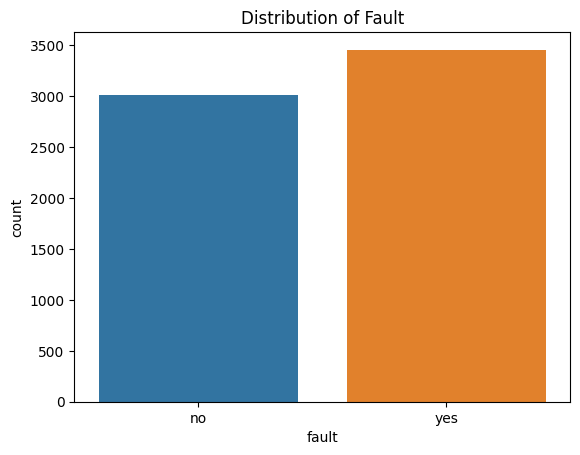

In [ ]:
sns.countplot(x='fault', data=df)
plt.title('Distribution of Fault')
plt.show()

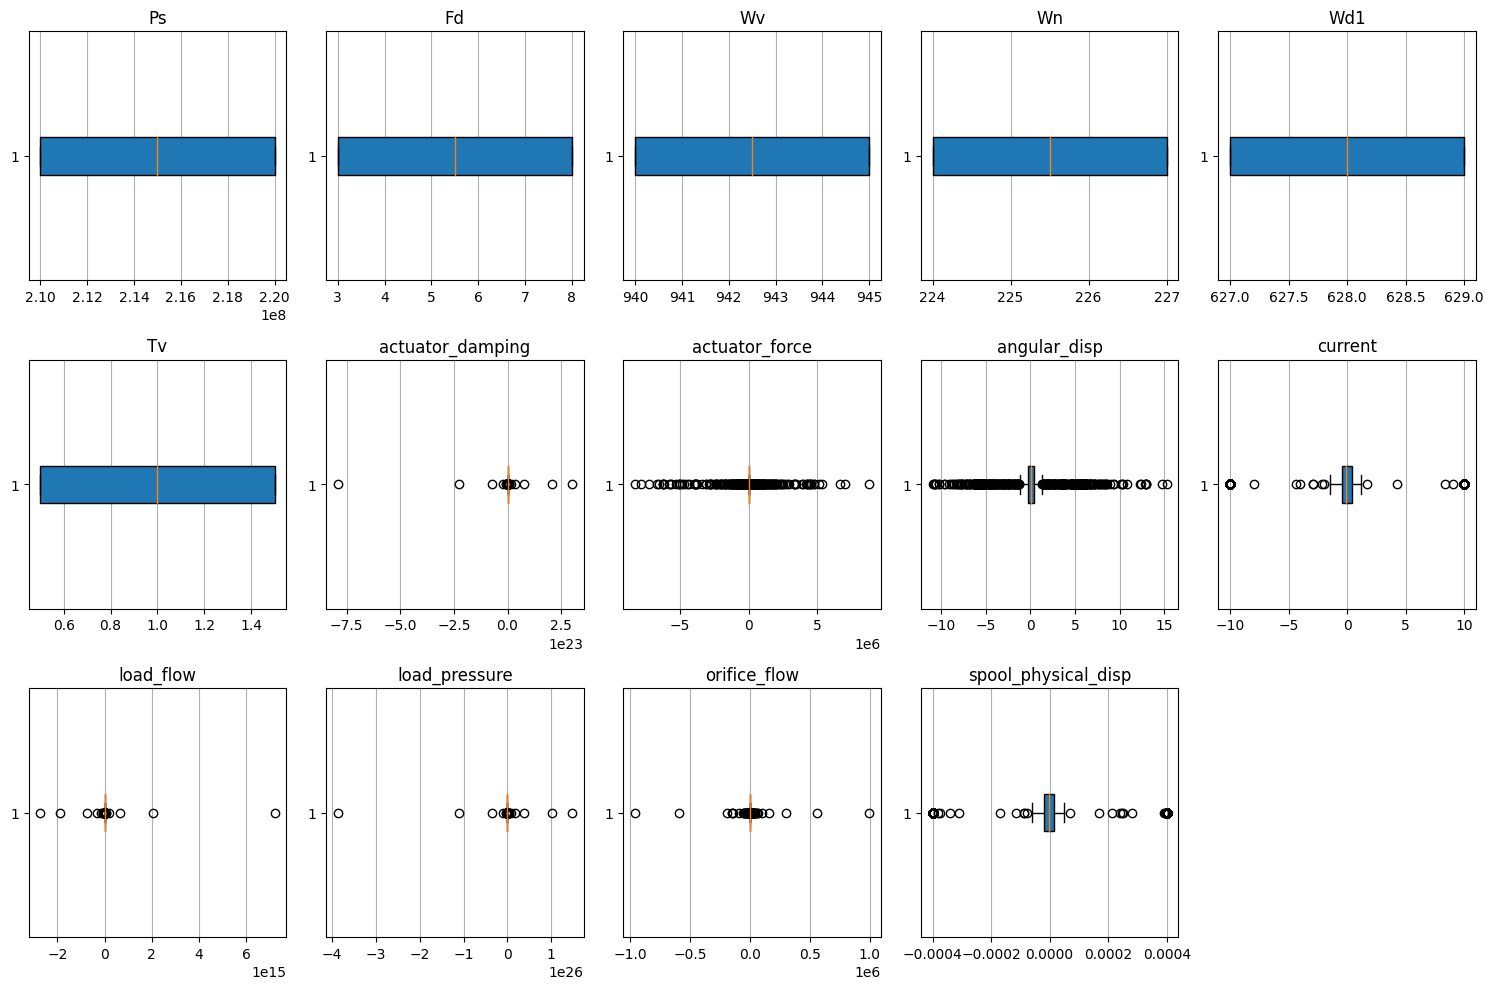

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

numerical_columns = df.drop(columns='fault')

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns.columns):
    plt.subplot(3, 5, i + 1)
    plt.boxplot(df[column], vert=False, patch_artist=True)
    plt.title(column)
    plt.grid(axis='x')

plt.tight_layout()
plt.show()

<ipython-input-25-1d573f542654>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


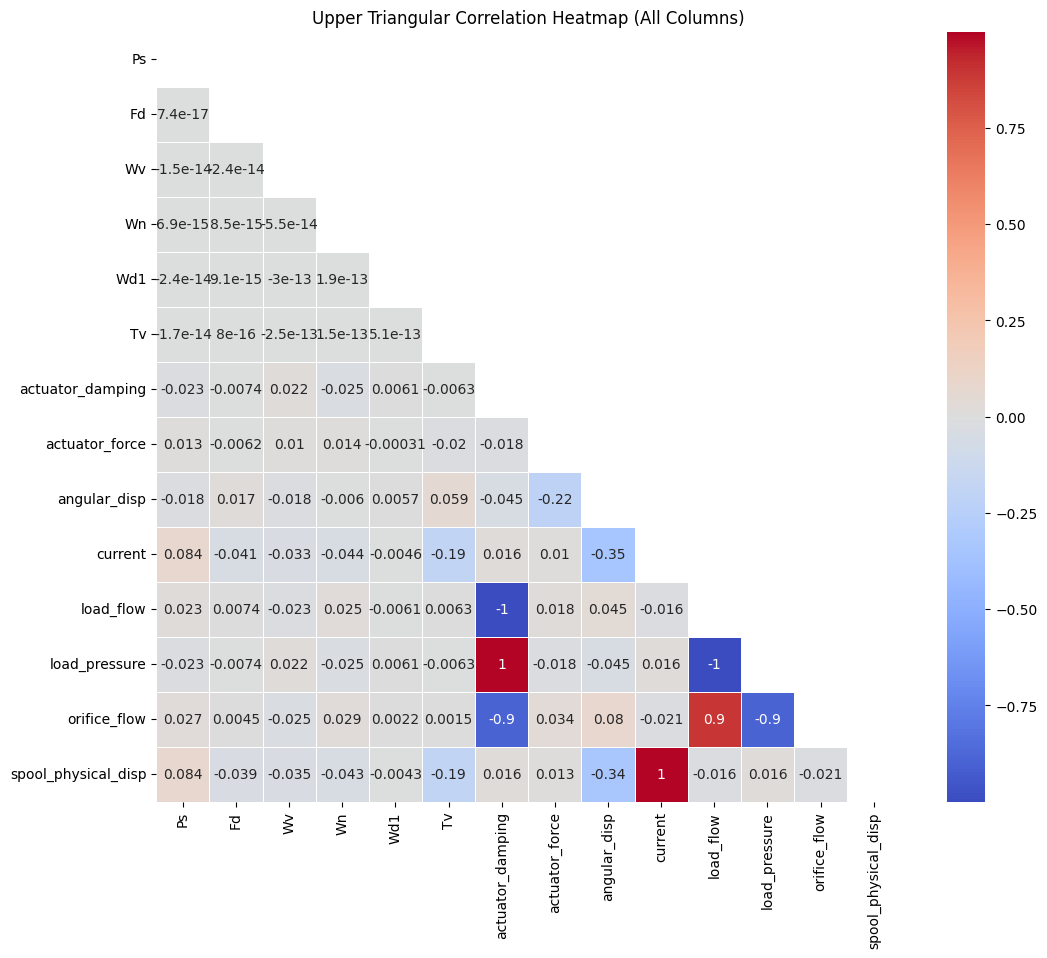

In [ ]:
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, mask=mask)
plt.title('Upper Triangular Correlation Heatmap (All Columns)')
plt.show()


In [ ]:
columns_to_remove = [ 'load_flow', 'load_pressure','orifice_flow']
data = df.drop(columns=columns_to_remove)
print(data)


             Ps  Fd   Wv   Wn  Wd1   Tv  actuator_damping  actuator_force  \
0     210000000   3  940  224  627  0.5      0.000000e+00    0.000000e+00   
1     210000000   3  940  224  627  0.5      6.982957e+02    1.513492e+02   
2     210000000   3  940  224  627  0.5      5.776379e+02    1.342813e+02   
3     210000000   3  940  224  627  0.5      6.697562e+02    1.249841e+02   
4     210000000   3  940  224  627  0.5      5.683639e+02    1.123912e+02   
...         ...  ..  ...  ...  ...  ...               ...             ...   
6459  220000000   8  945  227  629  1.5      1.660000e+19   -3.038895e+04   
6460  220000000   8  945  227  629  1.5      2.100000e+19    1.214654e+04   
6461  220000000   8  945  227  629  1.5      4.180000e+19    1.859282e+06   
6462  220000000   8  945  227  629  1.5      4.470000e+19    2.403383e+05   
6463  220000000   8  945  227  629  1.5      1.240000e+19   -4.819774e+04   

      angular_disp    current  spool_physical_disp fault  
0         0.0000

# **feature selection**

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

X = data.drop(columns=['fault'])
y = data['fault']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_normalized = pd.DataFrame(X_scaled, columns=X.columns)

normalized_encoded_data = pd.concat([X_normalized, pd.Series(y_encoded, name='fault')], axis=1)
data = normalized_encoded_data
print(data.head())


    Ps   Fd   Wv   Wn  Wd1   Tv  actuator_damping  actuator_force  \
0  0.0  0.0  0.0  0.0  0.0  0.0          0.725023        0.484747   
1  0.0  0.0  0.0  0.0  0.0  0.0          0.725023        0.484756   
2  0.0  0.0  0.0  0.0  0.0  0.0          0.725023        0.484755   
3  0.0  0.0  0.0  0.0  0.0  0.0          0.725023        0.484754   
4  0.0  0.0  0.0  0.0  0.0  0.0          0.725023        0.484754   

   angular_disp   current  spool_physical_disp  fault  
0      0.418057  0.500000             0.500104      0  
1      0.420253  0.526468             0.526472      0  
2      0.422512  0.525394             0.525472      0  
3      0.424648  0.523837             0.523972      0  
4      0.426626  0.521818             0.521973      0  


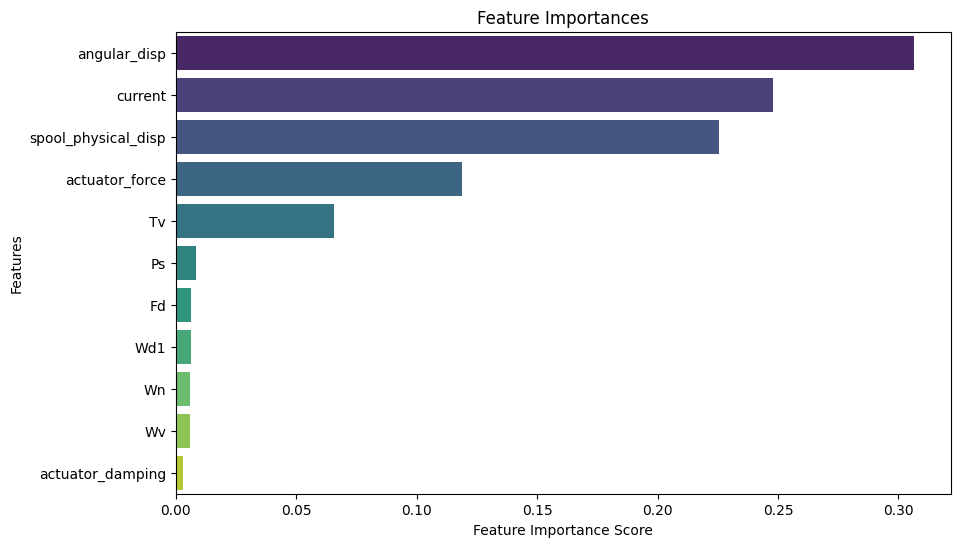

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = data.drop(columns=['fault'])
y = data['fault']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

feature_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)

feature_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

X = data.drop(columns=['fault'])
y = data['fault']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)

num_features_to_select = 5
rfe_selector = RFE(estimator=rf_classifier, n_features_to_select=num_features_to_select)
rfe_selector.fit(X_train, y_train)
selected_feature_indices = rfe_selector.support_

selected_features = X.columns[selected_feature_indices]

reduced_data = X[selected_features].copy()

# Add the target variable 'fault' back to the reduced data
reduced_data['fault'] = y.values

print(reduced_data)


       Tv  actuator_force  angular_disp   current  spool_physical_disp  fault
0     0.0        0.484747      0.418057  0.500000             0.500104      0
1     0.0        0.484756      0.420253  0.526468             0.526472      0
2     0.0        0.484755      0.422512  0.525394             0.525472      0
3     0.0        0.484754      0.424648  0.523837             0.523972      0
4     0.0        0.484754      0.426626  0.521818             0.521973      0
...   ...             ...           ...       ...                  ...    ...
6459  1.0        0.482970      0.638366  0.000000             0.000247      1
6460  1.0        0.485458      0.636503  0.000000             0.000247      1
6461  1.0        0.593496      0.117652  0.000000             0.000247      1
6462  1.0        0.498804      0.188554  0.000000             0.000247      1
6463  1.0        0.481928      0.201191  0.000000             0.000247      1

[6464 rows x 6 columns]


# **MODEL**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

X = reduced_data.drop(columns=['fault'])
y = reduced_data['fault']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': xgb.XGBClassifier()
}

for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    print(f"{name} Accuracy: {accuracy}")
    print(f"{name} Confusion Matrix:")
    print(confusion)
    print("="*30)


Logistic Regression Accuracy: 0.5406032482598608
Logistic Regression Confusion Matrix:
[[146 459]
 [135 553]]
Support Vector Machine Accuracy: 0.7006960556844548
Support Vector Machine Confusion Matrix:
[[300 305]
 [ 82 606]]
Decision Tree Accuracy: 0.9992266047950503
Decision Tree Confusion Matrix:
[[605   0]
 [  1 687]]
Random Forest Accuracy: 0.9961330239752514
Random Forest Confusion Matrix:
[[604   1]
 [  4 684]]
Gaussian Naive Bayes Accuracy: 0.6782675947409126
Gaussian Naive Bayes Confusion Matrix:
[[605   0]
 [416 272]]
K-Nearest Neighbors Accuracy: 0.9806651198762568
K-Nearest Neighbors Confusion Matrix:
[[604   1]
 [ 24 664]]
XGBoost Accuracy: 1.0
XGBoost Confusion Matrix:
[[605   0]
 [  0 688]]


## **Gaussian NB with hyperparameter tuning**



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Separate features and target variable
X = reduced_data.drop(columns=['fault'])
y = reduced_data['fault']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Gaussian Naive Bayes classifier
gnb_classifier = GaussianNB()

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=gnb_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best estimator
best_estimator = grid_search.best_estimator_

# Perform k-fold cross-validation to evaluate the accuracy
k_fold = 5
cross_val_scores = cross_val_score(best_estimator, X_train, y_train, cv=k_fold)
average_accuracy = cross_val_scores.mean()

# Fit the best estimator on the whole training data
best_estimator.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_estimator.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Average Cross-Validation Accuracy:", average_accuracy)
print("Test Set Accuracy:", accuracy)


Best Parameters: {'var_smoothing': 1e-09}
Average Cross-Validation Accuracy: 0.6859441781365925
Test Set Accuracy: 0.6805877803557618


# **SVC with hyperparameter tuning**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X = reduced_data.drop(columns=['fault'])
y = reduced_data['fault']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svc_classifier = SVC(random_state=42)

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(estimator=svc_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)


Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy: 0.7208043310131477
